# 1. Fraud: A How-To Guide

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
import numpy as np

In [66]:
data = pd.read_csv("./anonymized.csv")

In [67]:
data['Date'] = pd.to_datetime(data['Date'])

In [68]:
grouped_data = data.groupby([(data.Date.dt.year),(data.Date.dt.month)]).count()

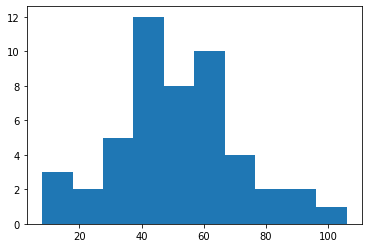

In [69]:
plt.hist(data.groupby([(data.Date.dt.year),(data.Date.dt.month)]).count().Amount);

In [70]:
new_data = data.groupby([(data.Date.dt.year),(data.Date.dt.month)]).count().Amount

In [113]:
# Find best parameters
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)

In [114]:
# Fit and print best bandwith
grid.fit(new_data.values.reshape(-1,1))
print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

best bandwidth: 10.0


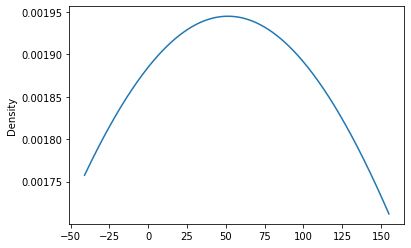

In [165]:
# Pandas KDE function
new_data.plot.kde(bw_method=10);

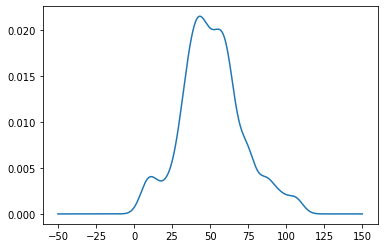

In [169]:
# sk.learns KDE function
kde = KernelDensity(bandwidth=5)
kde.fit(new_data.values.reshape(-1,1))
X_plot = np.linspace(-50, 150, 1000)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens));

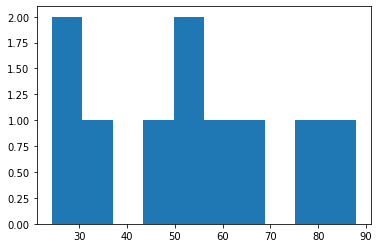

In [117]:
# 10 samples
new_samples = kde.sample(10, random_state=0)
plt.hist(new_samples);

# 2. Clustering Survey Data

In [153]:
p_cluster = [0.4, 0.3, 0.15, 0.15]

n_questions = 5
n_people = 5
n_clusters = len(p_cluster)

biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))
people = np.random.choice(range(n_clusters), size=n_people, p=p_cluster)
answers = np.zeros((n_people, n_questions), dtype=bool)

for a in range(n_people):
    # check which cluster
    cluster = people[a]
    # get biases in answers for the cluster and return answers for the given person
    answers[a, :] = np.random.rand(n_questions) < biases[:, cluster]

np.savetxt("questionnaire.csv", answers, delimiter=",", fmt="%d")
np.savetxt("questionnaire_answers.csv", people, delimiter=",", fmt="%d")
np.savetxt("questionnaire_biases.csv", biases, delimiter=",", fmt="%.3f")

In [158]:
answers = np.loadtxt("questionnaire.csv", delimiter=",")
n_people, n_questions = answers.shape
n_clusters = 4

# initial equal probability to all clusters; never updates
p_clusters = np.asarray([0.25, 0.25, 0.25, 0.25])
# initial random biases
biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))

def expectation(answers, biases, p_clusters):
    '''
        Should return each persons probability of being in each cluster
        based on the answers and the initial biases and p_clusters.
    '''
    # Adapted through the help of Albion Krasniqi # 
    
    people = np.zeros((n_people, n_clusters))
    # Iterate through each person
    for person in range(n_people):
        # Store the likelihood to come from each cluster
        p_cluster = np.ones((n_clusters))
        # Iterate through all questions and store answers likely to come from the cluster
        print(answers[person,:])
        #print(biases)
        for q in range(n_questions):
            for c in range(n_clusters):
                if answers[a,q] == 1:
                    p_cluster[c] *= biases[q,c]
                else:
                    p_cluster[c] *= (1-biases[q,c])
        people[person,:] = p_cluster
        print(people)

    # normalize the distributions
    people = people / people.sum(axis=1, keepdims=1)
    print(people)
    # latent variable of cluster "h"
    return people


def maximization(answers, people):
    '''
        Should update the biases so that answers are more likely to come from
        each class probability for each person (finding best biases to match
        the answers returned by the probability of being in each cluster)
    '''
    biases = np.zeros((n_questions, n_clusters)) + 0.5
    return biases


for step in range(1):
    people = expectation(answers, biases, p_clusters)
    biases = maximization(answers, people)

#print(biases)
#print(people)

[1. 1. 1. 1. 1.]
[[0.01152678 0.00332179 0.37375385 0.00137339]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
[1. 1. 1. 1. 0.]
[[0.01152678 0.00332179 0.37375385 0.00137339]
 [0.01152678 0.00332179 0.37375385 0.00137339]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
[1. 1. 1. 0. 0.]
[[0.01152678 0.00332179 0.37375385 0.00137339]
 [0.01152678 0.00332179 0.37375385 0.00137339]
 [0.01152678 0.00332179 0.37375385 0.00137339]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
[1. 1. 1. 1. 1.]
[[0.01152678 0.00332179 0.37375385 0.00137339]
 [0.01152678 0.00332179 0.37375385 0.00137339]
 [0.01152678 0.00332179 0.37375385 0.00137339]
 [0.01152678 0.00332179 0.37375385 0.00137339]
 [0.         0.         0.         0

Unfortunately, I failed to solve this problem as I was not able to extrac the probability of being in each class based on the answers.

In [ ]:
import numpy as np
import urllib.request

url = "https://course-resources.minerva.kgi.edu/uploaded_files/mke/rKwePr/questionnaire.csv"
f = urllib.request.urlopen(url)
answers = np.loadtxt(f, delimiter=",")
n_people, n_questions = answers.shape
n_clusters = 4

p_clusters = np.asarray([0.25, 0.25, 0.25, 0.25])
biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))


def expectation(answers, biases, p_clusters):
    # In this function we create our expectations.
	# P(cluster | answer) prop to P(answer | cluster) * P(cluster)
    people = np.zeros((n_people, n_clusters))
    
    for i in range(0, n_people):
        for j in range(0, n_clusters):
            prob_i = np.prod(biases[answers[i,:] == 1,j]) * np.prod(1-biases[answers[i,:] == 0,j]) 
            people[i,j] = prob_i*p_clusters[j]

    # normalize the distributions
    people = people / people.sum(axis=1, keepdims=1)
    return people


def maximization(answers, people):
    # Treating all the data as visible, now infer the parameters for the model.
    biases = np.zeros((n_questions, n_clusters))
    # for each class, compute the biases on each question
    for c in range(0, n_clusters):
        
        # Count up the probability mass for correct and incorrect for each class
        positive_mass = np.sum(np.tile(people[:,[c]],(1, n_questions)) * answers, axis=0)
        negative_mass = np.sum(np.tile(people[:,[c]],(1, n_questions)) * (1-answers), axis=0)
        biases[:,c] = positive_mass / (positive_mass + negative_mass)
    
    # Update the cluster probabilities
    sum_clusters = np.sum(people, axis = 0)
    cluster_prob = sum_clusters/np.sum(sum_clusters)
    
    # print(f"cluster priors: {cluster_prob}")
    
    return (biases, cluster_prob)


for step in range(10):
    people = expectation(answers, biases, p_clusters)
    biases, p_clusters = maximization(answers, people)

#print(biases)
#print(people)
#print(cluster_prob)
print(p_clusters)t

In [ ]:
class TrafficSim:
    def __init__(self, prob_slow, max_speed, prob_turn, density, strategy):      
        # Map of the roads
        self.map = np.zeros([16,16])
        self.map[:,4:6] = 1
        self.map[:,10:12] = 1
        self.map[4:6,:] = 1
        self.map[10:12,:] = 1
        
        # Horizontal Traffic Lights
        self.map[5,3] = 2
        self.map[11,3] = 2
        self.map[4,6] = 3
        self.map[10,6] = 3
        self.map[5,9] = 2
        self.map[11,9] = 2
        self.map[4,12] = 3
        self.map[10,12] = 3
        
        # Vertical Traffic Lights
        self.map[3,4] = 4
        self.map[3,10] = 4
        self.map[6,5] = 5
        self.map[6,11] = 5
        self.map[9,4] = 4
        self.map[9,10] = 4
        self.map[12,5] = 5
        self.map[12,11] = 5
        
        # Storing map properties
        self.cars_map = np.zeros([16,16])
        self.speeds_map = -np.ones([16,16])
        self.directions_map = np.zeros([16,16])
        self.new_cars_map = np.zeros([16,16])
        self.new_speeds_map = -np.ones([16,16])
        self.new_directions_map = np.zeros([16,16])
        
        # Roads
        self.roads_horizontal_east = [5,11]
        self.roads_horizontal_west = [4,10]
        self.roads_vertical_north = [5,11]
        self.roads_vertical_south = [4,10]
        
        # Maps directio to where to move on the space
        self.directions_mapping = {
            1: -1,
            2: 1,
            3: 1,
            4: -1,
        }
        
        # Additional properties
        self.max_speed = max_speed
        self.prob_slow = prob_slow
        self.prob_turn = prob_turn
        self.density = density
        self.strategy = strategy
        self.traffic_lights_timer_1 = 1
        self.traffic_lights_timer_2 = 1
        self.traffic_lights_status = True
        self.traffic_lights_status_2 = True
        self.road_col = None
        self.road_row = None
        self.road_cells = 16*6+16*4-16
        self.road_indexes = []
        self.history = []
        self.cars = []
        self.average_traffic_flow = []
        
        # Finds all the street cells 
        self.road_row, self.road_col = np.nonzero(self.map)
        for r, c in zip(self.road_row, self.road_col):
            self.road_indexes.append([r,c])
                
        # Chooses locations according to density on the road
        random_indexes = np.random.choice(len(self.road_indexes),size=int(round(self.density * len(self.road_indexes))),replace=False)
        
        # Places and stores information about each car
        for random_index in random_indexes:
            # Add cars
            self.cars_map[self.road_indexes[random_index][0],self.road_indexes[random_index][1]] = 2
            self.cars.append([self.road_indexes[random_index][0],self.road_indexes[random_index][1]])
            # Add speed
            self.speeds_map[self.road_indexes[random_index][0],self.road_indexes[random_index][1]] = np.random.randint(0, self.max_speed)
            # Add direction
            if self.road_indexes[random_index][0] in self.roads_horizontal_east:
                self.directions_map[self.road_indexes[random_index][0],self.road_indexes[random_index][1]] = 2
            elif self.road_indexes[random_index][0] in self.roads_horizontal_west:
                self.directions_map[self.road_indexes[random_index][0],self.road_indexes[random_index][1]] = 4
            if self.road_indexes[random_index][1] in self.roads_vertical_north:
                self.directions_map[self.road_indexes[random_index][0],self.road_indexes[random_index][1]] = 1
            elif self.road_indexes[random_index][1] in self.roads_vertical_south:
                self.directions_map[self.road_indexes[random_index][0],self.road_indexes[random_index][1]] = 3
                
    # Draws all arrays
    def draw(self, is_map=False, is_speeds=False, is_cars=False, is_directions=False):
        if is_map:
            plt.imshow(self.map)
            plt.xticks(np.arange(-.5, 16, 1))
            plt.yticks(np.arange(-.5, 16, 1))
            plt.grid()
        elif is_speeds:
            plt.imshow(self.speeds_map)
            plt.xticks(np.arange(-.5, 16, 1))
            plt.yticks(np.arange(-.5, 16, 1))
            plt.grid()
        elif is_cars:
            plt.imshow(self.cars_map)
            plt.xticks(np.arange(-.5, 16, 1))
            plt.yticks(np.arange(-.5, 16, 1))
            plt.grid()
        elif is_directions:
            plt.imshow(self.directions_map)
            plt.xticks(np.arange(-.5, 16, 1))
            plt.yticks(np.arange(-.5, 16, 1))
            plt.grid()
            
    def check_if_turning_right_horizontal(self, i, j, traffic_light, speed, remaining_steps):
        if 2 in self.cars_map[i+1:i+3,traffic_light]:
            remaining_steps = 0
            speed = j-traffic_light+1
        # Check if car after turn
        elif self.cars_map[i-1,traffic_light] == 2:
            remaining_steps = 0
            speed = j-traffic_light
        # Check if car two steps after turn
        elif self.cars_map[i-2,traffic_light] == 2 and j == traffic_light+1:
            remaining_steps = min(1, remaining_steps)
            speed = remaining_steps + 1
            
        return speed, remaining_steps
    
    def check_if_turning_right_horizontal_odd(self, i, j, traffic_light, speed, remaining_steps):
        if 2 in self.cars_map[i-2:i,traffic_light]:
            remaining_steps = 0
            speed = traffic_light-1-j
        # check if car after turn
        elif self.cars_map[i+1,traffic_light] == 2:
            remaining_steps = 0
            speed = traffic_light-j
        # check if car two steps after turn
        elif self.cars_map[i+2,traffic_light] == 2 and j == traffic_light-1:
            remaining_steps = min(1, remaining_steps)
            speed = remaining_steps + 1
            
        return speed, remaining_steps
    
    def check_if_turning_left_horizontal(self, i, j, traffic_light, speed, remaining_steps):
        # Check if car already in intersection before turn
        if 2 in self.cars_map[i-1:i,traffic_light-1] or self.cars_map[i+1,traffic_light] == 2:
            remaining_steps = 0
            speed = j-traffic_light+1
        # Check if car coming straight
        elif 2 in self.cars_map[i+1,1:traffic_light]:
            remaining_steps = 0
            speed = j-traffic_light-1
            
        return speed, remaining_steps
    
    def check_if_turning_left_horizontal_odd(self, i, j, traffic_light, speed, remaining_steps):
        # check if car already in intersection before turn
        if 2 in self.cars_map[i-2:i,traffic_light] or self.cars_map[i+1,traffic_light+1] == 2:
            remaining_steps = 0
            speed = traffic_light-1-j
        # check if car coming straight
        elif 2 in self.cars_map[i-1,5:traffic_light-1]:
            remaining_steps = 0
            speed = 5-j
        return speed, remaining_steps
    
    def get_new_position_horizontal_turn(self, i, j, remaining_steps, speed, right_turn, i_direction_map, new_direction):
        j_direction = self.directions_mapping[self.directions_map[i,j]]
        i_direction = i_direction_map[right_turn]
        new_i = int(i+i_direction*remaining_steps)
        new_j = int((j +j_direction*(speed-remaining_steps)) % 16)
        if new_j in [4,5]:
            self.new_directions_map[new_i, new_j] = new_direction[new_j]
        else:
            self.new_directions_map[new_i, new_j] = self.directions_map[i,j]

        self.new_cars_map[new_i, new_j] = 2
        self.new_speeds_map[new_i, new_j] = speed
    
    def get_new_position_horizontal(self, i, j, remaining_steps, speed, right_turn, i_direction_map, new_direction):
        j_direction = self.directions_mapping[self.directions_map[i,j]]
        i_direction = i_direction_map[right_turn]
        new_i = int(i)
        new_j = int((j + j_direction*speed) % 16)
        self.new_cars_map[new_i, new_j] = 2
        self.new_directions_map[new_i, new_j] = self.directions_map[i,j]
        self.new_speeds_map[new_i, new_j] = self.speeds_map[i,j]
        
    
    def handle_turn_even_horizontal(self, i, j, remaining_steps, speed, i_direction, j_direction, right_turn, i_direction_map, new_direction):
        let_turn = False
        # Check if at first intersection and able to cross
        if 2 < (j + (j_direction*speed)) < 5 and j > 6:
            traffic_light = 5
            let_turn = True
        elif 8 < j + (j_direction*speed) < 11 and j > 12:
            traffic_light = 11
            let_turn = True
        if let_turn:
            if right_turn:
                # Get remaining steps to turn
                steps_to_intersection = j-traffic_light
                remaining_steps = max(0,speed-steps_to_intersection)
                speed, remaining_steps = self.check_if_turning_right_horizontal(i,j,traffic_light,speed,remaining_steps)

            # Same for left turn
            else:
                steps_to_intersection = j-traffic_light-1
                remaining_steps = max(0,speed-steps_to_intersection)
                speed, remaining_steps = self.check_if_turning_left_horizontal(i,j,traffic_light,speed,remaining_steps)

            self.get_new_position_horizontal(i, j, remaining_steps, speed, right_turn, i_direction_map, new_direction)    

        else:
            new_i = int(i)
            new_j = int((j + j_direction*speed) % 16)
            self.new_cars_map[new_i, new_j] = 2
            self.new_directions_map[new_i, new_j] = self.directions_map[i,j]
            self.new_speeds_map[new_i, new_j] = self.speeds_map[i,j]
            
    def handle_turn_odd_horizontal(self, i, j, remaining_steps, speed, i_direction, j_direction, right_turn, i_direction_map, new_direction):
        let_turn = False
        if 4 < j + (j_direction*speed) < 7 and j < 4:
            traffic_light = 4
            let_turn = True
        elif 10 < j + (j_direction*speed) < 13 and j < 9:
            traffic_light = 10
            let_turn = True
        if let_turn:
            if right_turn:
                steps_to_intersection = traffic_light-j
                remaining_steps = max(0,speed-steps_to_intersection)
                speed, remaining_steps = self.check_if_turning_right_horizontal_odd(i, j, traffic_light, speed, remaining_steps)

            else:
                steps_to_intersection = traffic_light+1-j
                remaining_steps = max(0,speed-steps_to_intersection)
                speed, remaining_steps = self.check_if_turning_left_horizontal_odd(i, j, traffic_light, speed, remaining_steps)

            self.get_new_position_horizontal_turn(i, j, remaining_steps, speed, right_turn, i_direction_map, new_direction)    

        else:
            self.get_new_position_horizontal(i, j, remaining_steps, speed, right_turn, i_direction_map, new_direction)    
    
    def check_if_turning_right_vertical(self, i, j, traffic_light, speed, remaining_steps):
        if 2 in self.cars_map[traffic_light,j-3:j]:
            remaining_steps = 0
            speed = i-traffic_light+1
        # check if car after turn
        elif self.cars_map[traffic_light,j+1] == 2:
            remaining_steps = 0
            speed = i-traffic_light
        # check if car two steps after turn
        elif self.cars_map[traffic_light,j-2] == 2 and i == traffic_light+1:
            remaining_steps = min(1, remaining_steps)
            speed = remaining_steps + 1
            
        return speed, remaining_steps
    
    def check_if_turning_right_vertical_even(self, i, j, traffic_light, speed, remaining_steps):
        # check if car in intersection before turn
        if 2 in self.cars_map[traffic_light,j+1:j+3]:
            remaining_steps = 0
            speed = traffic_light-1-i
        # check if car after turn
        elif self.cars_map[traffic_light,j-1] == 2:
            remaining_steps = 0
            speed = traffic_light-i
        # check if car two steps after turn
        elif self.cars_map[traffic_light,j-2] == 2 and i == traffic_light-1:
            remaining_steps = min(1, remaining_steps)
            speed = remaining_steps + 1
    
        return speed, remaining_steps
    
    def check_if_turning_left_vertical(self, i, j, traffic_light, speed, remaining_steps):
        # check if car already in intersection before turn
        if 2 in self.cars_map[traffic_light,j-3:j] or self.cars_map[traffic_light-1,j+1] == 2:
            remaining_steps = 0
            speed = i-traffic_light+1
        # check if car coming straight
        elif 2 in self.cars_map[1:traffic_light,j-1]:
            remaining_steps = 0
            speed = i-traffic_light-1
            
        return speed, remaining_steps
    
    def check_if_turning_left_vertical_even(self, i, j, traffic_light, speed, remaining_steps):
        if 2 in self.cars_map[traffic_light,j+1:j+3] or self.cars_map[traffic_light+1,j-1] == 2:
            remaining_steps = 0
            speed = traffic_light-1-i
        # check if car coming straight
        elif 2 in self.cars_map[traffic_light+1:traffic_light+5,j-1]:
            remaining_steps = 0
            speed = traffic_light+1-i
            
        return speed, remaining_steps

    def get_new_position_vertical_turn(self, i, j, remaining_steps, speed, right_turn, j_direction_map, new_direction):
        i_direction = self.directions_mapping[self.directions_map[i,j]]
        j_direction = j_direction_map[right_turn]
        new_j = int(j+j_direction*remaining_steps)
        new_i = int((i + i_direction*(speed-remaining_steps)) % 16)
        if new_i in [4,5]:
            self.new_directions_map[new_i, new_j] = new_direction[new_i]
        else:
            self.new_directions_map[new_i, new_j] = self.directions_map[i,j]

        self.new_cars_map[new_i, new_j] = 2
        self.new_speeds_map[new_i, new_j] = speed
        
    
    def get_new_position_vertical_odd(self, i, j, remaining_steps, speed, right_turn, j_direction_map, new_direction):
        i_direction = self.directions_mapping[self.directions_map[i,j]]
        j_direction = j_direction_map[right_turn]
        new_i = int((i + i_direction*speed) % 16)
        new_j = int(j)
        if 10 > i > 4 and i + i_direction*speed < 6:
            if self.traffic_lights_status == 1:
                if (2 in self.cars_map[5,j-3:j] and i > 5 and 2 in self.directions_map[5,j+1:j+4]) or 2 in self.cars_map[4,j+1:j+4]:
                    new_i = 6 if i >= 6 else i
                    self.new_cars_map[new_i, j] = 2
                    self.new_directions_map[new_i, j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, j] = 0
                else:
                    self.new_cars_map[new_i, new_j] = 2
                    self.new_directions_map[new_i, new_j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, new_j] = self.speeds_map[i,j]
            else: 
                if (2 in self.cars_map[5,j-2:j] and i > 5 and 4 in self.directions_map[5,j+1:j+4]) or 2 in self.cars_map[4,j:j+2]:
                    new_i = 6 if i >= 6 else i
                    self.new_cars_map[new_i, j] = 2
                    self.new_directions_map[new_i, j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, j] = 0
                else:
                    self.new_cars_map[new_i, new_j] = 2
                    self.new_directions_map[new_i, new_j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, new_j] = self.speeds_map[i,j]
        elif 15 > i > 10 and i + i_direction*speed < 12:
            if self.traffic_lights_status_2 == 1:
                if (2 in self.cars_map[11,j-3:j] and i > 11) or 2 in self.cars_map[10,j+1:j+4]:
                    new_i = 12 if i >= 12 else i
                    self.new_cars_map[new_i, j] = 2
                    self.new_directions_map[new_i, j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, j] = 0
                else:
                    self.new_cars_map[new_i, new_j] = 2
                    self.new_directions_map[new_i, new_j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, new_j] = self.speeds_map[i,j]
            else:
                if (2 in self.cars_map[11,j-2:j] and i > 11) or 2 in self.cars_map[10,j:j+2]:
                    new_i = 12 if i >= 12 else i
                    self.new_cars_map[new_i, j] = 2
                    self.new_directions_map[new_i, j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, j] = 0
                else:
                    self.new_cars_map[new_i, new_j] = 2
                    self.new_directions_map[new_i, new_j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, new_j] = self.speeds_map[i,j]
        else:
            self.new_cars_map[new_i, new_j] = 2
            self.new_directions_map[new_i, new_j] = self.directions_map[i,j]
            self.new_speeds_map[new_i, new_j] = self.speeds_map[i,j]
    
    def get_new_position_vertical_even(self, i, j, remaining_steps, speed, right_turn, j_direction_map, new_direction):
        i_direction = self.directions_mapping[self.directions_map[i,j]]
        j_direction = j_direction_map[right_turn]
        new_i = int((i + i_direction*speed) % 16)
        new_j = int(j)
        if i <= 4 and i + i_direction*speed > 3:
            if self.traffic_lights_status == 1:
                if (2 in self.cars_map[4,j+1:j+4] and i < 4 and 4 in self.directions_map[4,j+1:j+4]) or 2 in self.cars_map[5,j-3:j+1]:
                    new_i = 3 if i <= 3 else i
                    self.new_cars_map[new_i, j] = 2
                    self.new_directions_map[new_i, j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, j] = 0
                else:
                    self.new_cars_map[new_i, new_j] = 2
                    self.new_directions_map[new_i, new_j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, new_j] = self.speeds_map[i,j]
                    
            else:
                if (2 in self.cars_map[4,j+1:j+3] and i < 4) or 2 in self.cars_map[5,j-1:j+1]:
                    new_i = 3 if i <= 3 else i
                    self.new_cars_map[new_i, j] = 2
                    self.new_directions_map[new_i, j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, j] = 0
                else:
                    self.new_cars_map[new_i, new_j] = 2
                    self.new_directions_map[new_i, new_j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, new_j] = self.speeds_map[i,j]

        elif 6 < i < 11 and i + i_direction*speed > 9:
            if self.traffic_lights_status_2 == 1:
                if (2 in self.cars_map[10,j+1:j+4] and i < 10 and 4 in self.directions_map[4,j+1:j+4]) or 2 in self.cars_map[11,j-3:j+1]:
                    new_i = 9 if i <= 9 else i
                    self.new_cars_map[new_i, j] = 2
                    self.new_directions_map[new_i, j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, j] = 0
                else:
                    self.new_cars_map[new_i, new_j] = 2
                    self.new_directions_map[new_i, new_j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, new_j] = self.speeds_map[i,j]
            else:
                if (2 in self.cars_map[10,j+1:j+3] and i < 10) or 2 in self.cars_map[11,j-1:j+1]:
                    new_i = 9 if i <= 9 else i
                    self.new_cars_map[new_i, j] = 2
                    self.new_directions_map[new_i, j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, j] = 0
                else:
                    self.new_cars_map[new_i, new_j] = 2
                    self.new_directions_map[new_i, new_j] = self.directions_map[i,j]
                    self.new_speeds_map[new_i, new_j] = self.speeds_map[i,j]
        else:
            self.new_cars_map[new_i, new_j] = 2
            self.new_directions_map[new_i, new_j] = self.directions_map[i,j]
            self.new_speeds_map[new_i, new_j] = self.speeds_map[i,j]
        
    def handle_turn_odd_vertical(self, i, j, remaining_steps, speed, i_direction, j_direction, right_turn, j_direction_map, new_direction):
        let_turn = False
        if 2 < (i + (i_direction*speed)) < 5 and i > 6:
            traffic_light = 5
            let_turn = True
        elif 8 < i + (i_direction*speed) < 11  and i > 12:
            traffic_light = 11
            let_turn = True
        if let_turn:
            if right_turn:
                steps_to_intersection = i-traffic_light
                remaining_steps = max(0,speed-steps_to_intersection)
                speed, remaining_steps = self.check_if_turning_right_vertical(i,j,traffic_light,speed,remaining_steps)

            else:
                steps_to_intersection = i-traffic_light-1
                remaining_steps = max(0,speed-steps_to_intersection)
                speed, remaining_steps = self.check_if_turning_left_vertical(i,j,traffic_light,speed,remaining_steps)

            self.get_new_position_vertical_turn(i, j, remaining_steps, speed, right_turn, j_direction_map, new_direction)    
        else:
            self.get_new_position_vertical_odd(i, j, remaining_steps, speed, right_turn, j_direction_map, new_direction)
        
    def handle_turn_even_vertical(self, i, j, remaining_steps, speed, i_direction, j_direction, right_turn, j_direction_map, new_direction):
        let_turn = False
        if 4 < i + (i_direction*speed) < 7 and i < 4:
            traffic_light = 4
            let_turn = True
        elif 10 < i + (i_direction*speed) < 13 and i < 10: 
            traffic_light = 10
            let_turn = True
        if let_turn:
            if right_turn:
                steps_to_intersection = traffic_light -1
                remaining_steps = max(0,speed-steps_to_intersection)
                speed, remaining_steps = self.check_if_turning_right_vertical_even(i, j, traffic_light, speed, remaining_steps)

            else:
                steps_to_intersection = traffic_light+1-i
                remaining_steps = max(0,speed-steps_to_intersection)
                speed, remaining_steps = self.check_if_turning_left_vertical_even(i, j, traffic_light, speed, remaining_steps)

            self.get_new_position_vertical_turn(i, j, remaining_steps, speed, right_turn, j_direction_map, new_direction)
        else:
            self.get_new_position_vertical_even(i, j, remaining_steps, speed, right_turn, j_direction_map, new_direction)
    
    # Update the position of horizontal cars
    def update_horizontal(self):
        i_direction_map = {
            True: 1,
            False: -1
        }
        new_direction = {
            5: 1,
            4: 3,
            11: 1,
            10: 3, 
        }
        # Move cars
        for i in [4,5,10,11]:
            for j in range(16):
                # Check if element is car and moving horizontally
                if self.cars_map[i,j] == 2 and self.directions_map[i,j] not in [1,3]:
                    # Decide if car will turn
                    turn = True if random.random() < self.prob_turn else False
                    # Decide if car will turn right or left
                    right_turn = True if random.random() < 0.5 else False
                    # Get speed of car and store old speed for updated speed
                    speed = self.speeds_map[i,j]
                    old_speed = self.speeds_map[i,j]
                    let_turn = False
                    # Get direction of the car (where it will move)
                    j_direction = self.directions_mapping[self.directions_map[i,j]]
                    i_direction = i_direction_map[right_turn]
                    remaining_steps = 0
                    
                    if turn:
                        if i in [4,10]:
                            self.handle_turn_even_horizontal(i, j, remaining_steps, speed, i_direction, j_direction, right_turn, i_direction_map, new_direction)
                        elif i in [5,11]:
                            self.handle_turn_odd_horizontal(i, j, remaining_steps, speed, i_direction, j_direction, right_turn, i_direction_map, new_direction)       
                    else:
                        self.get_new_position_horizontal(i, j, remaining_steps, speed, right_turn, i_direction_map, new_direction)    
              
    def update_vertical(self):
        j_direction_map = {
            True: 1,
            False: -1
        }
        new_direction = {
            5: 2,
            4: 4,
            11: 2,
            10: 4, 
        }
        for j in [4,5,10,11]:
            for i in range(16):
                if self.cars_map[i,j] == 2 and self.directions_map[i,j] not in [2,4]:
                    turn = True if random.random() < self.prob_turn else False
                    right_turn = True if random.random() < 0.5 else False
                    speed = self.speeds_map[i,j]
                    old_speed = self.speeds_map[i,j]
                    i_direction = self.directions_mapping[self.directions_map[i,j]]
                    j_direction = j_direction_map[right_turn]
                    let_turn = False
                    remaining_steps = 0
                    
                    if turn:
                        if j in [4,10]:
                            self.handle_turn_even_vertical(i, j, remaining_steps, speed, i_direction, j_direction, right_turn, j_direction_map, new_direction)
                        elif j in [5,11]:
                            self.handle_turn_odd_vertical(i, j, remaining_steps, speed, i_direction, j_direction, right_turn, j_direction_map, new_direction)       
                    else:
                        if j in [4,10]:
                            self.get_new_position_vertical_even(i, j, remaining_steps, speed, right_turn, j_direction_map, new_direction)    
                        elif j in [5,11]:
                            self.get_new_position_vertical_odd(i, j, remaining_steps, speed, right_turn, j_direction_map, new_direction)    
                        
    
    def update(self):
        self.new_cars_map = np.zeros([16,16])
        self.new_speeds_map = -np.ones([16,16])
        self.new_directions_map = np.zeros([16,16])
        if self.strategy == 1:
            if (self.traffic_lights_timer_2%5==0 and self.traffic_lights_status_2) or (self.traffic_lights_timer_2%2==0 and (self.traffic_lights_status_2 == False)):
                self.traffic_lights_status_2 = not self.traffic_lights_status_2
                self.traffic_lights_timer_2 = 0
            if (self.traffic_lights_timer_1%3==0 and self.traffic_lights_status) or (self.traffic_lights_timer_1%2==0 and (self.traffic_lights_status == False)):
                self.traffic_lights_status = not self.traffic_lights_status
                self.traffic_lights_timer_1 = 0
        else:
            if (self.traffic_lights_timer_1%3==0 and self.traffic_lights_status) or (self.traffic_lights_timer_1%2==0 and (self.traffic_lights_status == False)):
                self.traffic_lights_status = not self.traffic_lights_status
                self.traffic_lights_status_2 = not self.traffic_lights_status_2
                self.traffic_lights_timer_1 = 0
        self.traffic_lights_timer_1 += 1
        self.traffic_lights_timer_2 += 1
        
        for i in [4,5,10,11]:
            for j in range(16):
                traffic_light_road_map = {
                    4: 3,
                    5: 2,
                    10: 3,
                    11: 2,
                }
                if self.cars_map[i,j] == 2 and self.directions_map[i,j] not in [1,3]:
                    distance = 1
                    if i in [4,5]:
                    # Updating speed
                        if self.traffic_lights_status == 1:
                            while self.cars_map[i, (j + (self.directions_mapping[self.directions_map[i,j]]*distance)) % 16] == 0:
                                 distance += 1
                        else:
                            while self.cars_map[i, (j + (self.directions_mapping[self.directions_map[i,j]]*distance)) % 16] == 0 and self.map[i, (j + (self.directions_mapping[self.directions_map[i,j]]*distance)) % 16] != traffic_light_road_map[i]:
                                distance += 1
                                
                    else:
                        # Updating speed
                        if self.traffic_lights_status_2 == 1:
                            while self.cars_map[i, (j + (self.directions_mapping[self.directions_map[i,j]]*distance)) % 16] == 0:
                                 distance += 1
                        else:
                            while self.cars_map[i, (j + (self.directions_mapping[self.directions_map[i,j]]*distance)) % 16] == 0 and self.map[i, (j + (self.directions_mapping[self.directions_map[i,j]]*distance)) % 16] != traffic_light_road_map[i]:
                                distance += 1
                    
                    # Acceleration
                    if self.speeds_map[i,j] < self.max_speed:
                        self.speeds_map[i,j] += 1

                        # Deceleration
                    if self.speeds_map[i,j] >= distance:
                        self.speeds_map[i,j] = distance - 1

                    # Randomization
                    if (self.speeds_map[i,j] > 0) and (np.random.uniform() < self.prob_slow):
                        self.speeds_map[i,j] -= 1
                    
                    
        for j in [4,5,10,11]:
            for i in range(16):
                traffic_light_road_map = {
                    4: 4,
                    5: 5,
                    10: 4,
                    11: 5
                }
                if self.cars_map[i,j] == 2 and self.directions_map[i,j] not in [2,4]:
                    # Updating speed
                    distance = 1
                    if i < 3:
                        if self.traffic_lights_status == 0:
                            while self.cars_map[(i + (self.directions_mapping[self.directions_map[i,j]]*distance)) % 16, j] == 0:
                                distance += 1
                        else:
                            while self.cars_map[(i + (self.directions_mapping[self.directions_map[i,j]]*distance)) % 16, j] == 0 and self.map[(i + (self.directions_mapping[self.directions_map[i,j]]*distance)) % 16, j] != traffic_light_road_map[j]:
                                distance += 1
                    
                    else:
                        if self.traffic_lights_status_2 == 0:
                            while self.cars_map[(i + (self.directions_mapping[self.directions_map[i,j]]*distance)) % 16, j] == 0:
                                distance += 1
                        else:
                            while self.cars_map[(i + (self.directions_mapping[self.directions_map[i,j]]*distance)) % 16, j] == 0 and self.map[(i + (self.directions_mapping[self.directions_map[i,j]]*distance)) % 16, j] != traffic_light_road_map[j]:
                                distance += 1

                    # Acceleration
                    if self.speeds_map[i,j] < self.max_speed:
                        self.speeds_map[i,j] += 1
                        
                    # Deceleration
                    if self.speeds_map[i,j] >= distance:
                        self.speeds_map[i,j] = distance - 1
                        
                    # Randomization
                    if (self.speeds_map[i,j] > 0) and (np.random.uniform() < self.prob_slow):
                        self.speeds_map[i,j] -= 1
                    
        self.update_horizontal()
        self.update_vertical()
    
        self.cars_map, self.speeds_map, self.directions_map = self.new_cars_map, self.new_speeds_map, self.new_directions_map
        self.history.append(self.directions_map)
        self.average_traffic_flow.append((sum(sum(self.speeds_map)) + (16*16-len(self.cars))) / self.road_cells)